In [63]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import matplotlib as mpl

from shapely.geometry import asShape
from descartes import PolygonPatch

In [2]:
data_map = json.load(open("./data/colombia_deptos_population_map.geojson"))

In [3]:
r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1e3PXAVDF_gPTx-_GTHU9hTAClEKJj5Y_D2_YsW6Vd6U&output=csv')
#https://docs.google.com/spreadsheets/d/1e3PXAVDF_gPTx-_GTHU9hTAClEKJj5Y_D2_YsW6Vd6U/edit?usp=sharing
data = r.content
df = pd.read_csv(io.StringIO(data.decode("utf-8")))

In [4]:
d_names = {
    "AMAZONAS":"Amazonas",
    "ANTIOQUIA":"Antioquia",
    "ARAUCA":"Arauca",
    "ATLANTICO":"Atlántico",
    "BOGOTA":"Bogotá",
    "BOLIVAR":"Bolívar",
    "BOYACA":"Boyacá",
    "CALDAS":"Caldas",
    "CAQUETA":"Caquetá",
    "CASANARE":"Casanare",
    "CAUCA":"Cauca",
    "CESAR":"Cesar",
    "CHOCO":"Chocó",
    "CORDOBA":"Córdoba",
    "CUNDINAMARCA":"C/marca",
    "GUAINIA":"Guainía",
    "GUAJIRA":"Guajira",
    "GUAVIARE":"Guaviare",
    "HUILA":"Huila",
    "MAGDALENA":"Magdalena",
    "META":"Meta",
    "NARINO":"Nariño",
    "NSANTANDER":"N. Santander",
    "PUTUMAYO":"Putumayo",
    "QUINDIO":"Quindío",
    "RISARALDA":"Risaralda",
    "SANDRES":"San Andrés",
    "SANTANDER":"Santander",
    "SUCRE":"Sucre",
    "TOLIMA":"Tolima",
    "VALLE":"Valle",
    "VAUPES":"Vaupés",
    "VICHADA":"Vichada"
}

In [5]:
s = pd.Series(df['anticorrupcion2018'])

In [6]:
s.index = df['nombre_depto']

In [7]:
zero_value = (255,255,255)
bottom_value = (255,70,0)
top_value = (0,0,255)

In [8]:
def simple_scale(val, min_val, max_val, lower_value, upper_value):
    val_diff = max_val - min_val
    norm_val = (val - min_val)/val_diff
    r_diff = upper_value[0] - lower_value[0]
    g_diff = upper_value[1] - lower_value[1]
    b_diff = upper_value[2] - lower_value[2]
    ret_val = (lower_value[0] + int(norm_val*r_diff),
               lower_value[1] + int(norm_val*g_diff),
               lower_value[2] + int(norm_val*b_diff))
    return ret_val

In [9]:
def div_scale(val, min_val, zero_val, max_val, lower_color, zero_color, upper_color):
    if val >= zero_val:
        return simple_scale(val, zero_val, max_val, zero_color, upper_color)
    else:
        return simple_scale(val, min_val, zero_val, lower_color, zero_color)

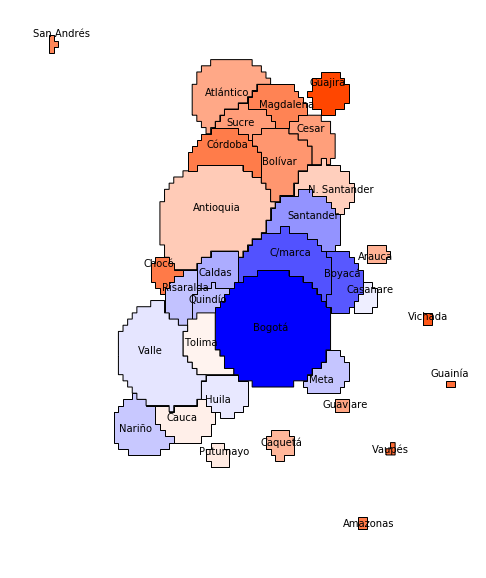

In [83]:
fig = plt.figure(figsize=(8, 10))
plt.axis('off')
ax = fig.gca() 

for feat in data_map["features"]:
    geom = asShape(feat["geometry"])
    x, y = geom.centroid.x, geom.centroid.y
    ax.plot(x, y, '-')
    d_name = feat["properties"]["DPTO"]
    value = s.loc[d_name]
    color = div_scale(value, min_val=s.min(), zero_val=33, max_val=s.max(), lower_color=bottom_value, zero_color=zero_value, upper_color=top_value)
    ax.add_patch(PolygonPatch(feat["geometry"], fc=[color[0]/255,color[1]/255,color[2]/255], ec='black',
                alpha=1, lw=1, ls='-', zorder=2))
    ax.text(x-0.6, y + (np.random.rand() - 0.55)*0.55, d_names[d_name], fontsize=10)

In [86]:
colors_color_bar = []
for i in range(int(s.min()) + 1, int(s.max()) + 1):
    #if i%2 == 0:
    #    color = div_scale(i, min_val=s.min(), zero_val=33, max_val=s.max(), lower_color=bottom_value, zero_color=zero_value, upper_color=top_value)
    #    colors_color_bar.append((color[0]/255, color[1]/255, color[2]/255))
    color = div_scale(i, min_val=s.min(), zero_val=33, max_val=s.max(), lower_color=bottom_value, zero_color=zero_value, upper_color=top_value)
    colors_color_bar.append((color[0]/255, color[1]/255, color[2]/255))

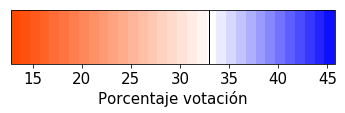

In [96]:
# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap= matplotlib.colors.ListedColormap(colors_color_bar)
norm = mpl.colors.Normalize(vmin=s.min(), vmax=s.max())

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.add_lines(levels=[33], colors=[(0,0,0)], linewidths=[1])
cb1.set_label('Porcentaje votación', size=15)
cb1.ax.tick_params(labelsize=15) 